In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

#Import the time Module
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e93463a312d9bbbd41e00fe179c78cdd


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | dicabisagan
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | alugan
Processing Record 8 of Set 1 | fez
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | sovetskiy
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | okha
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | semey
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | huitzuco
City not found. Skipping...
Processing Record 18 of Set 1 | puerto del rosario
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | rikitea
Processi

Processing Record 37 of Set 4 | sao filipe
Processing Record 38 of Set 4 | batemans bay
Processing Record 39 of Set 4 | vikhorevka
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | raseiniai
Processing Record 42 of Set 4 | merauke
Processing Record 43 of Set 4 | vetlanda
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | udachnyy
Processing Record 47 of Set 4 | mastic beach
Processing Record 48 of Set 4 | skelleftea
Processing Record 49 of Set 4 | jalu
Processing Record 50 of Set 4 | chake chake
Processing Record 1 of Set 5 | lazaro cardenas
Processing Record 2 of Set 5 | manati
Processing Record 3 of Set 5 | bassano
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | placerville
Processing Record 6 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 5 | quetta
Processing Record 8 of Set 5 | parrita
Processing Record 9 of Set 5 

Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | noumea
Processing Record 30 of Set 8 | jabiru
City not found. Skipping...
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | nova olinda do norte
Processing Record 35 of Set 8 | balakhninskiy
Processing Record 36 of Set 8 | guayabal
Processing Record 37 of Set 8 | presidente olegario
Processing Record 38 of Set 8 | rapid valley
Processing Record 39 of Set 8 | kindu
Processing Record 40 of Set 8 | rio gallegos
Processing Record 41 of Set 8 | guryevsk
Processing Record 42 of Set 8 | ijaki
City not found. Skipping...
Processing Record 43 of Set 8 | dakar
Processing Record 44 of Set 8 | matucana
Processing Record 45 of Set 8 | paka
Processing Record 46 of Set 8 | konch
Processing Record 47 of Set 8 | zyryanka
Processing Record 48 of Set 8 | kahului
Processing Record 49 of Set 8 | 

Processing Record 14 of Set 12 | palauig
Processing Record 15 of Set 12 | lensk
Processing Record 16 of Set 12 | monte escobedo
Processing Record 17 of Set 12 | chulumani
Processing Record 18 of Set 12 | syamzha
Processing Record 19 of Set 12 | bonavista
Processing Record 20 of Set 12 | willmar
Processing Record 21 of Set 12 | pokhara
Processing Record 22 of Set 12 | dawson
Processing Record 23 of Set 12 | te anau
Processing Record 24 of Set 12 | snasa
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | mirnyy
Processing Record 27 of Set 12 | charters towers
Processing Record 28 of Set 12 | muros
Processing Record 29 of Set 12 | hay river
Processing Record 30 of Set 12 | yaan
Processing Record 31 of Set 12 | cobija
Processing Record 32 of Set 12 | columbus
Processing Record 33 of Set 12 | copiapo
Processing Record 34 of Set 12 | poum
Processing Record 35 of Set 12 | laguna
Processing Record 36 of Set 12 | mayo
Processing Record 37 of Set 12 | yaroslavskaya
Proce

In [7]:
len(city_data)

585

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.50,-165.41,12.20,85,1,8.12,US,2020-10-31 16:04:07
1,Ushuaia,-54.80,-68.30,55.40,54,40,3.36,AR,2020-10-31 16:04:07
2,Nikolskoye,59.70,30.79,41.00,86,75,4.47,RU,2020-10-31 16:04:07
3,Dicabisagan,17.08,122.42,76.57,82,100,14.74,PH,2020-10-31 16:04:07
4,Bredasdorp,-34.53,20.04,66.20,48,0,13.87,ZA,2020-10-31 16:04:08
5,Alugan,12.22,125.48,80.98,81,100,17.74,PH,2020-10-31 16:04:08
6,Fez,34.04,-5.00,80.60,30,0,6.93,MA,2020-10-31 15:59:10
7,Sovetskiy,61.36,63.58,33.96,97,73,7.63,RU,2020-10-31 16:04:08
8,Punta Arenas,-53.15,-70.92,51.80,71,0,9.17,CL,2020-10-31 16:02:14
9,Okha,53.57,142.95,34.11,90,95,7.54,RU,2020-10-31 16:04:09


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2020-10-31 16:04:07,64.50,-165.41,12.20,85,1,8.12
1,Ushuaia,AR,2020-10-31 16:04:07,-54.80,-68.30,55.40,54,40,3.36
2,Nikolskoye,RU,2020-10-31 16:04:07,59.70,30.79,41.00,86,75,4.47
3,Dicabisagan,PH,2020-10-31 16:04:07,17.08,122.42,76.57,82,100,14.74
4,Bredasdorp,ZA,2020-10-31 16:04:08,-34.53,20.04,66.20,48,0,13.87


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

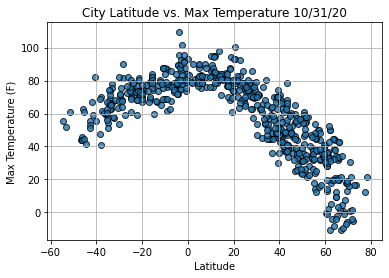

In [12]:
# Get today's time in seconds
today = time.time()

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

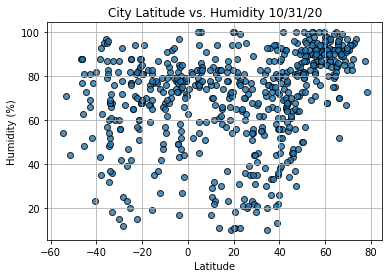

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           coudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#